# Prediction monthly champagne sales

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

[Load data](https://lazyprogrammer.me/course_files/sp500sub.csv)

In [17]:
df = pd.read_csv('sp500sub.csv', index_col='Date', parse_dates=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 225077 entries, 2010-01-04 to 2018-12-28
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Open       225070 non-null  float64
 1   High       225070 non-null  float64
 2   Low        225070 non-null  float64
 3   Close      225070 non-null  float64
 4   Adj Close  225070 non-null  float64
 5   Volume     225070 non-null  float64
 6   Name       225077 non-null  object 
dtypes: float64(6), object(1)
memory usage: 13.7+ MB


In [19]:
df

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.220000,9.510000,9.170000,9.500000,9.500000,1865400.0,INCY
2010-01-05,9.510000,10.290000,9.450000,10.270000,10.270000,7608900.0,INCY
2010-01-06,10.380000,11.090000,10.350000,11.000000,11.000000,8046700.0,INCY
2010-01-07,11.000000,11.060000,10.620000,10.820000,10.820000,3680300.0,INCY
2010-01-08,10.820000,11.000000,10.750000,10.940000,10.940000,1529300.0,INCY
...,...,...,...,...,...,...,...
2018-12-21,41.000000,41.900002,40.369999,40.680000,39.367714,17481400.0,MDLZ
2018-12-24,40.720001,40.849998,39.200001,39.480000,38.206425,6641300.0,MDLZ
2018-12-26,39.619999,40.029999,38.779999,40.000000,38.709652,8640100.0,MDLZ


In [20]:
df[df['Open'].isnull()]

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2012-10-29,NaN,NaN,NaN,NaN,NaN,NaN,KMI
2018-12-05,NaN,NaN,NaN,NaN,NaN,NaN,NEM
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,CAH
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,CAH
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,KIM
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,RSG
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,SLG


In [21]:
df.dropna(inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 225070 entries, 2010-01-04 to 2018-12-28
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Open       225070 non-null  float64
 1   High       225070 non-null  float64
 2   Low        225070 non-null  float64
 3   Close      225070 non-null  float64
 4   Adj Close  225070 non-null  float64
 5   Volume     225070 non-null  float64
 6   Name       225070 non-null  object 
dtypes: float64(6), object(1)
memory usage: 13.7+ MB


In [23]:
df

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.220000,9.510000,9.170000,9.500000,9.500000,1865400.0,INCY
2010-01-05,9.510000,10.290000,9.450000,10.270000,10.270000,7608900.0,INCY
2010-01-06,10.380000,11.090000,10.350000,11.000000,11.000000,8046700.0,INCY
2010-01-07,11.000000,11.060000,10.620000,10.820000,10.820000,3680300.0,INCY
2010-01-08,10.820000,11.000000,10.750000,10.940000,10.940000,1529300.0,INCY
...,...,...,...,...,...,...,...
2018-12-21,41.000000,41.900002,40.369999,40.680000,39.367714,17481400.0,MDLZ
2018-12-24,40.720001,40.849998,39.200001,39.480000,38.206425,6641300.0,MDLZ
2018-12-26,39.619999,40.029999,38.779999,40.000000,38.709652,8640100.0,MDLZ


Количество уникальных акций

In [27]:
df['Name'].nunique()

104

In [30]:
df[df['Name'] == 'AAPL']

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,30.490000,30.642857,30.340000,30.572857,26.466835,123432400.0,AAPL
2010-01-05,30.657143,30.798571,30.464285,30.625713,26.512596,150476200.0,AAPL
2010-01-06,30.625713,30.747143,30.107143,30.138571,26.090879,138040000.0,AAPL
2010-01-07,30.250000,30.285715,29.864286,30.082857,26.042646,119282800.0,AAPL
2010-01-08,30.042856,30.285715,29.865715,30.282858,26.215786,111902700.0,AAPL
...,...,...,...,...,...,...,...
2018-12-21,156.860001,158.160004,149.630005,150.729996,147.747253,95744600.0,AAPL
2018-12-24,148.149994,151.550003,146.589996,146.830002,143.924454,37169200.0,AAPL
2018-12-26,148.300003,157.229996,146.720001,157.169998,154.059814,58582500.0,AAPL


In [24]:
df.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2018-12-14', '2018-12-17', '2018-12-18', '2018-12-19',
               '2018-12-20', '2018-12-21', '2018-12-24', '2018-12-26',
               '2018-12-27', '2018-12-28'],
              dtype='datetime64[ns]', name='Date', length=225070, freq=None)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 1964-01-01 to 1972-09-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   105 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


Теперь все ок

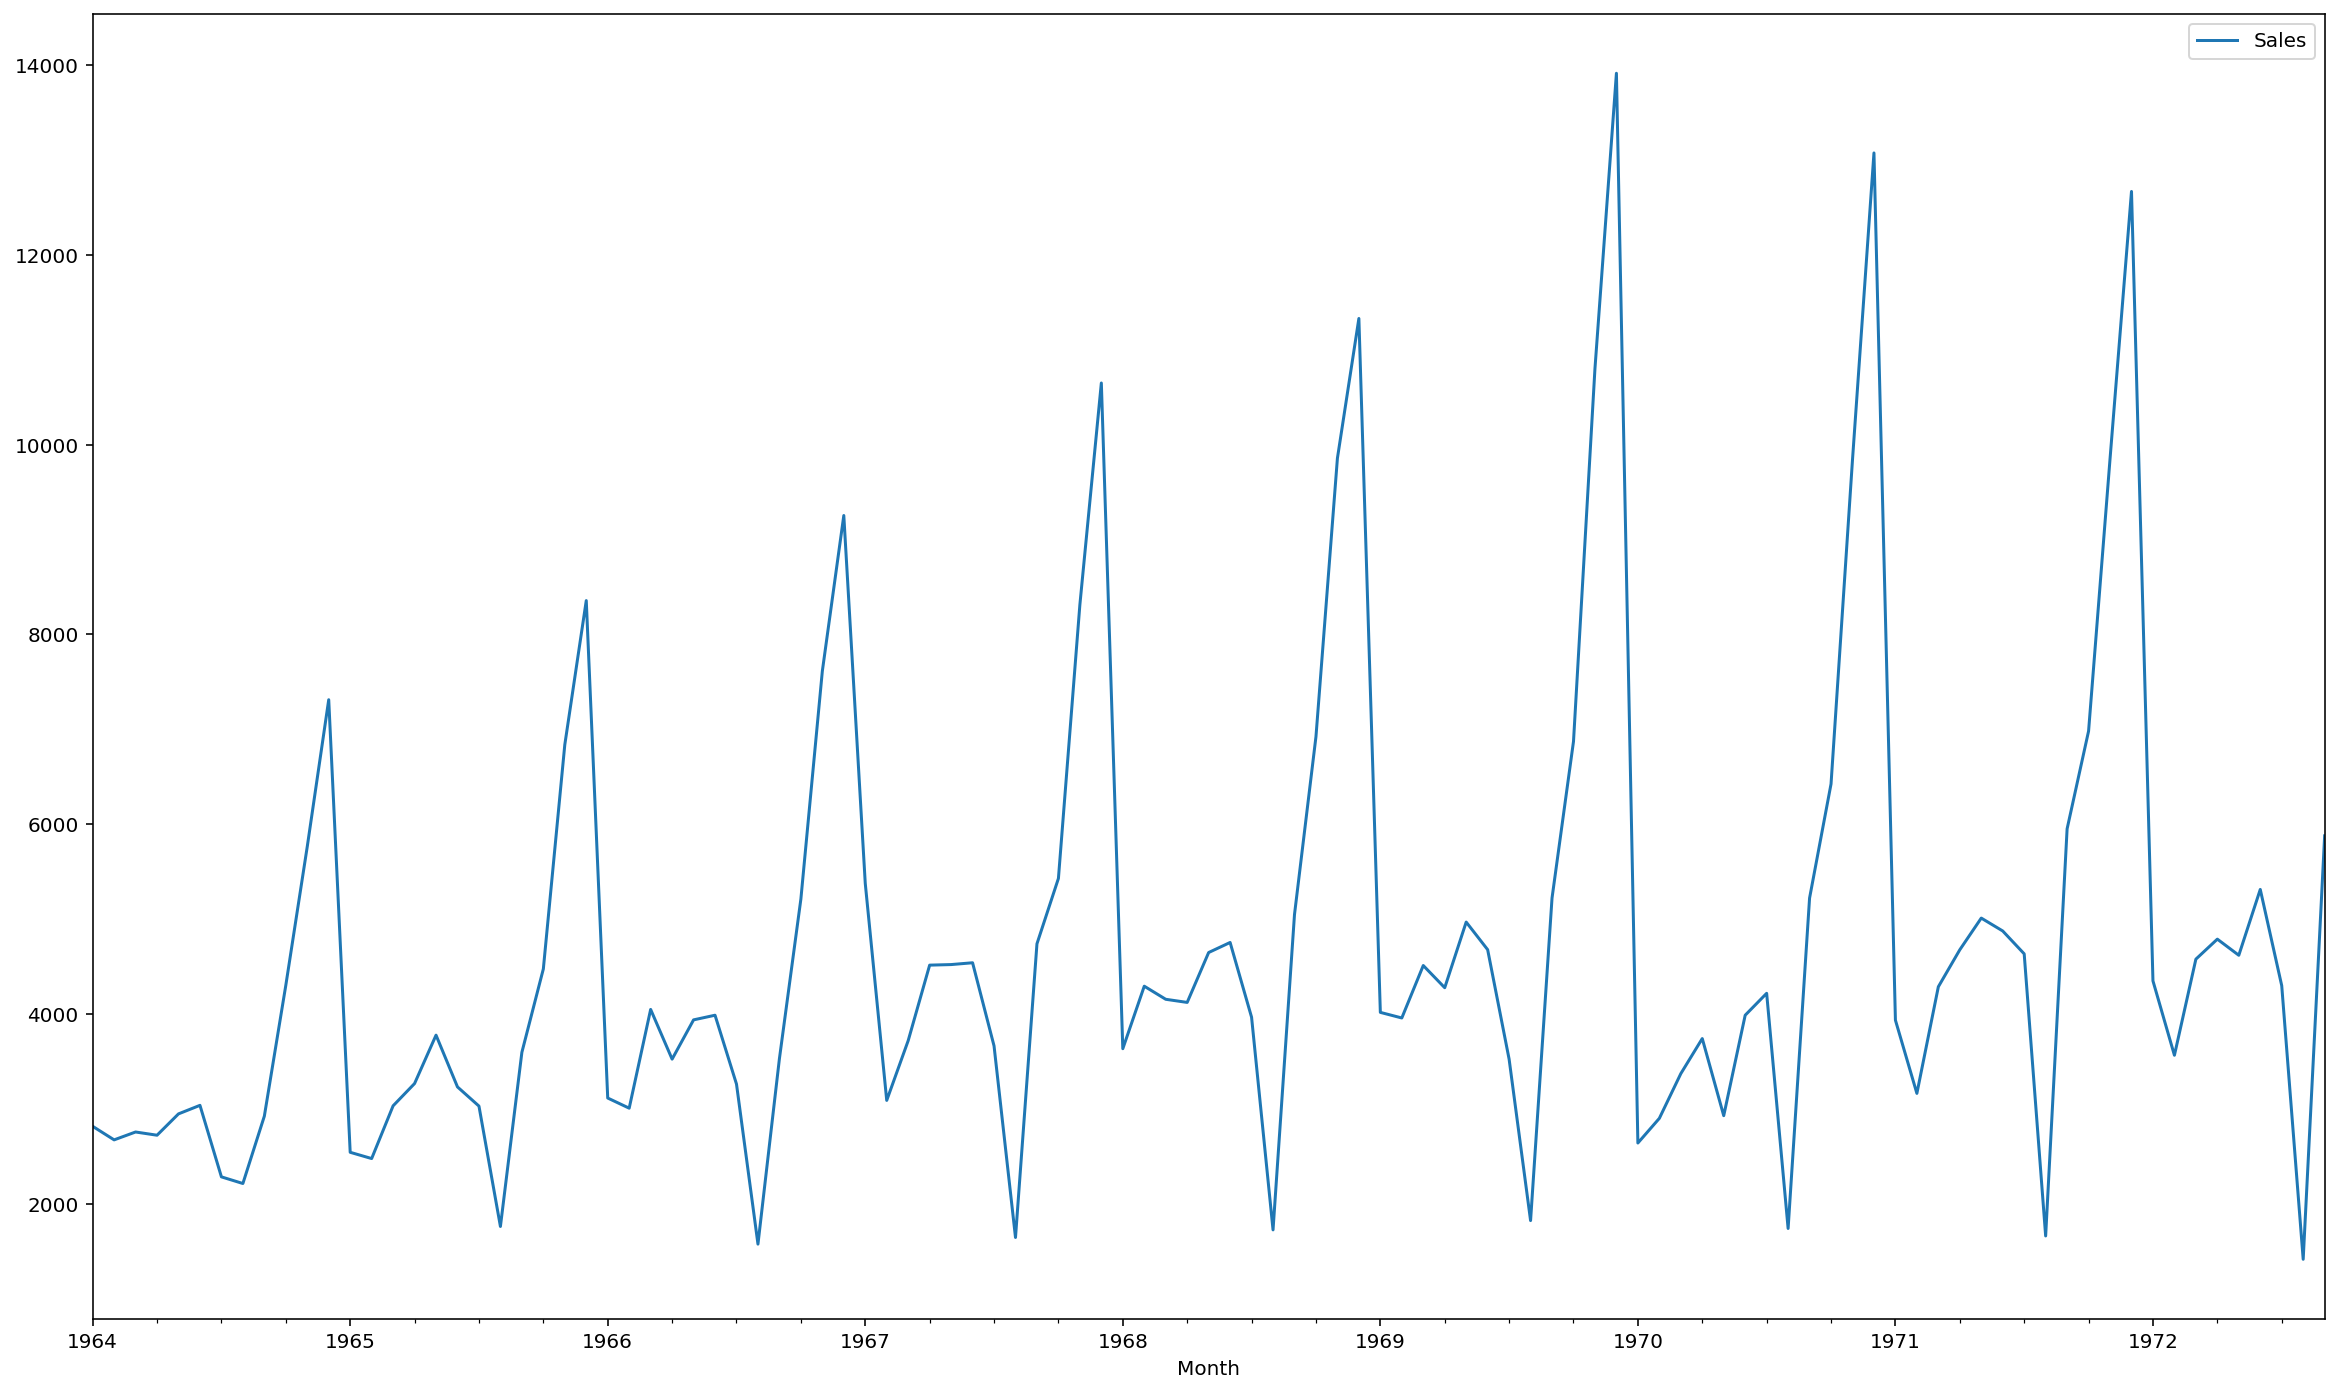

In [92]:
df.plot(figsize=(20, 12));

In [93]:
df.shape

(105, 1)

## Train/Test split

Разделяю выборку просто на две части. На тест оставляю последние 12 записей

In [105]:
N_test = 12

In [95]:
train = df.iloc[:-N_test]
test = df.iloc[-N_test:]

In [96]:
# boolean series to index df rows
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

## Create model

In [97]:
hw = ExponentialSmoothing(
    train['Sales'],
    initialization_method='legacy-heuristic',
    trend='add', seasonal='add', 
    seasonal_periods=12 # тут по логике сезонный цикл 12 месяцев
)
results_hw = hw.fit()

In [98]:
df.loc[train_idx, 'Train Prediction'] = results_hw.fittedvalues
df.loc[test_idx, 'Test Prediction'] = results_hw.forecast(N_test)

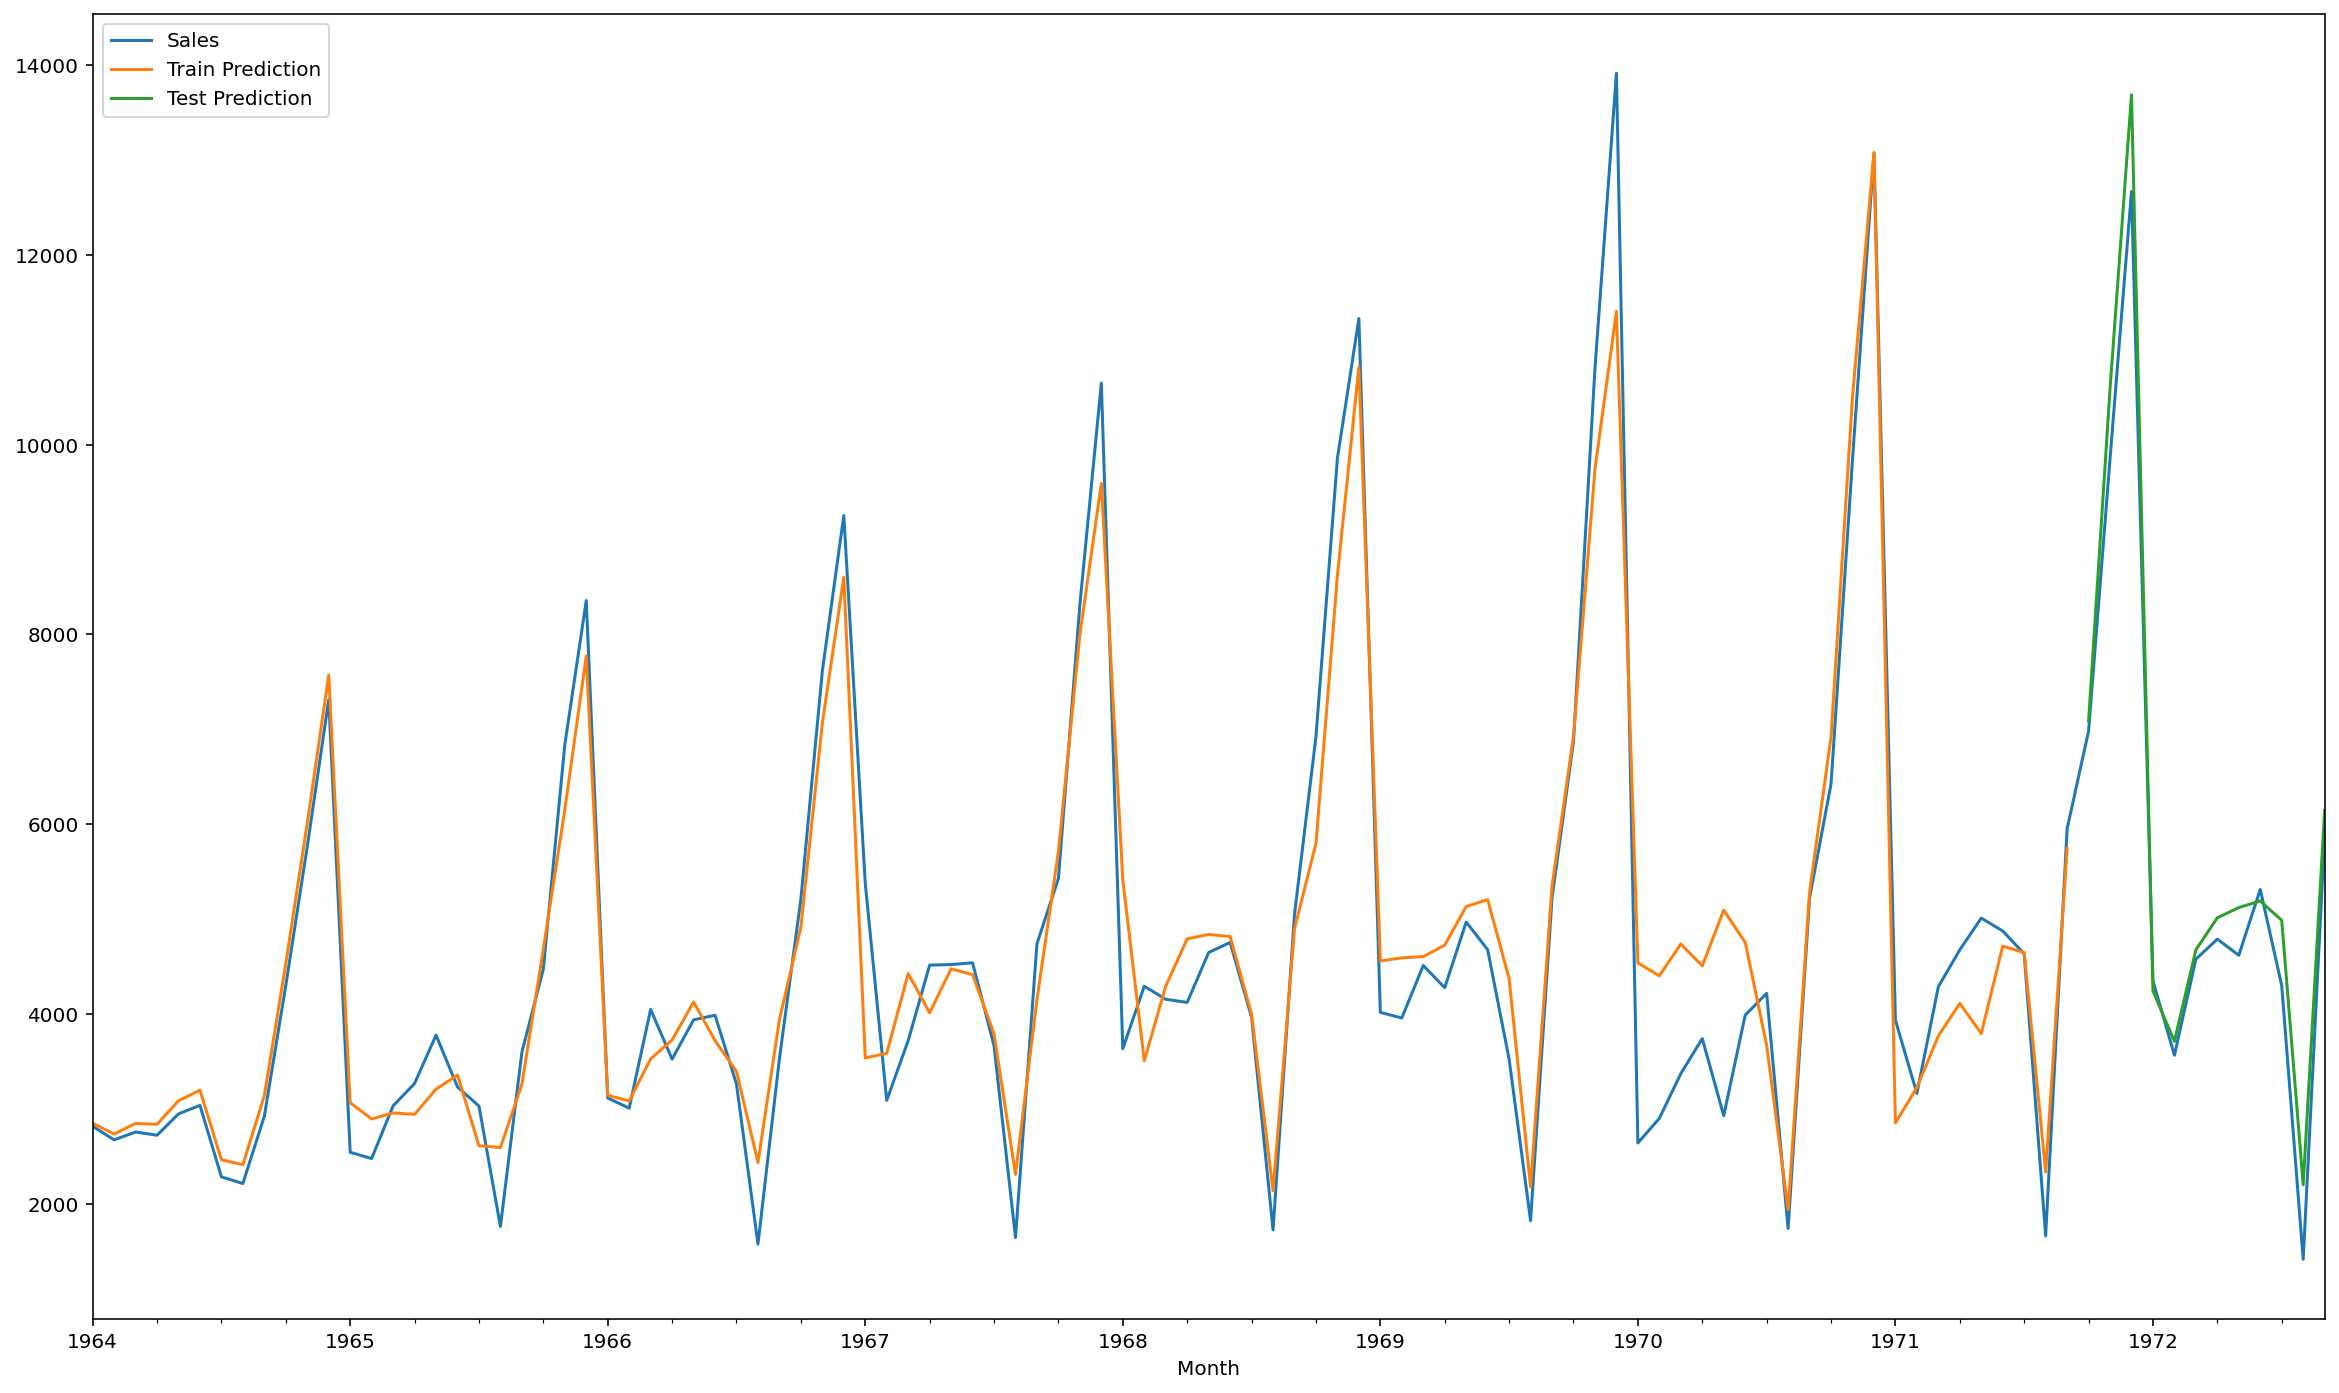

In [99]:
df.plot(figsize=(20, 12));

### Metrics

In [100]:
y_tain, y_test = train['Sales'], test['Sales']
y_tain_pred, y_test_pred = results_hw.fittedvalues, results_hw.forecast(N_test)

In [101]:
print(f'Train MAE: {mean_absolute_error(y_tain, y_tain_pred)}')
print(f'Test MAE: {mean_absolute_error(y_test, y_test_pred)}')

Train MAE: 509.21382707970207
Test MAE: 400.7004521920696


In [102]:
print(f'Train RMSE: {mean_squared_error(y_tain, y_tain_pred, squared=False)}')
print(f'Test RMSE: {mean_squared_error(y_test, y_test_pred, squared=False)}')

Train RMSE: 712.4708547120806
Test RMSE: 509.97414217426865


In [104]:
print(f'Train R2: {r2_score(y_tain, y_tain_pred)}')
print(f'Test R2: {r2_score(y_test, y_test_pred)}')

Train R2: 0.9169984903500262
Test R2: 0.9680340910154467
